# Artificial Neural Networks and Deep Learning

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

Simon Shaw
<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## What this is about:

- Artificial Neural Networks

- Deep Learning

- MNIST digit recognition

As usual our emphasis will be on *doing* rather than *proving*:
*just enough: progress at pace*

### Assigned Reading

For this material you are recommended Chapter 3 of [UDL], 
then Chapter 3 of [NND], and Chapter 6 of [MLFCES].

- UDL: Understanding Deep Learning, by Simon J.D. Prince. PDF draft available here:
<https://udlbook.github.io/udlbook/>
- NND: Neural Network Design by Martin T. Hagan, Howard B. Demuth, Mark Hudson Beale, Orlando De Jesús. <https://hagan.okstate.edu/nnd.html> and <https://hagan.okstate.edu/NNDesign.pdf>
- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm,
  Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. 
  <http://smlbook.org>.
- DL: Deep Learning, by Ian Goodfellow, Yoshua Bengio and Aaron Courville <https://www.deeplearningbook.org>

These can be accessed legally and without cost.

The [DL] book has rapidly become something of a classic - it's rich in content but
might not be an easy introductory read: that will depend on the individual though.

There are also these useful references for coding:

- PT: `python`: <https://docs.python.org/3/tutorial>
- NP: `numpy`: <https://numpy.org/doc/stable/user/quickstart.html>
- MPL: `matplotlib`: <https://matplotlib.org>

## Context

In the last section of this course we are going to take a look at the 
mathematical formulation of artificial neural networks.

We will be building on the feed forward algorithm we met in the section
on perceptrons.

We know (or at least imagine) that, given the weights and biases, 
the network carves up the output space into compartments that can
be used for classification.

But we need to start with training data, and use this to determine the
weights and biases. We will cover the essentials of:

- cost, error, loss
- gradient descent
- hyperparameters
- back propagation
- activation functions

We start by looking at the data we are going to use: 
**The MNIST data set of handwritten digits**.

This will all be done manually - we wont use `sklearn` for this section


In [1]:
# our usual imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas
import matplotlib.pyplot as plt

### MNIST Data Set of Handwritten Digits

The original source of these digitized images is here:
<http://yann.lecun.com/exdb/mnist/>

This format isn't particularly easy to work with, so this site,
<https://pjreddie.com/projects/mnist-in-csv/>, makes two 
CSV files available:

- `MNIST_train.csv` - $60,000$ handwritten digit images, for training
- `MNIST_test.csv`  - $10,000$ handwritten digit images, for testing

Further, for testing and development it is useful to have
small data sets, and so Rashid for his book 
**Make Your Own Neural Network**, at
<https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork>,
made these two smaller sets,

- `MNIST_train_100.csv` - $100$, for training
- `MNIST_test_10.csv` - $10$, for testing

This book was also used for these notes. Note that the test set here is not *exhaustive*
in that not all labels are included. This means that you'll get errors below for the confusion mamtrix if you use this one.

There are also these (home made), for intermediate use:

- `MNIST_train_1000.csv` - $1000$, for training
- `MNIST_test_100.csv` - $100$, for testing    

Let's get the data - you may need to need to grab it and unzip it from
brightspace (or use binder).

We'll make it easy to choose which data set with a `choice` variable.

In [2]:
choice = 2
if choice == 0:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test.csv', header=None)
elif choice == 1:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_1000.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_100.csv', header=None)
elif choice == 2:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_100.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_100.csv', header=None)
else:
  df_train = pandas.read_csv(r'./data/MNIST/MNIST_train_100.csv', header=None)
  df_test  = pandas.read_csv(r'./data/MNIST/MNIST_test_10.csv', header=None)

In [3]:
# it will take a bit of work to see what these data files hold
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This doesn't look too promising ... but we'll get there. 

The first column contains the labels. The remaining columns contain 
$28^2$ pixel values for the digitized image of the label.

Let's push on ...

In [4]:
# We assign the pixel values to X_train and X_test
X_train = df_train.iloc[:, 1:].values
X_test  = df_test.iloc[:, 1:].values
N_train = X_train.shape[0]
N_test  = X_test.shape[0]
print(f'N_train = {N_train}, N_test = {N_test}')

# And we assign the first column labels 0,1,2,...,9 to ... 
train_labels = df_train.iloc[:, 0].values
test_labels  = df_test.iloc[:, 0].values

print(X_train.shape)
print(X_test.shape)
print(train_labels.shape)
print(test_labels.shape)

N_train = 100, N_test = 100
(100, 784)
(100, 784)
(100,)
(100,)


Here are the first 10 labels in the training set... 

In [5]:
print(train_labels[:9])

[5 0 4 1 9 2 1 3 1]


And now the first ten labels in the test set...

In [6]:
print(test_labels[:9])

[3 8 0 5 4 3 8 3 2]


We choose the third row (indexed as 2) in the training set to demonstrate

There are 28x28 = 784 pixel values: 0,1,...,255
0 is white, 255 is black 2,3,...,254 are grays


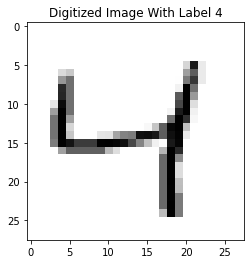

In [7]:
# Let's choose the third row (indexed as 2) 
row = 2
plt.imshow( X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')
plt.title(f'Digitized Image With Label {train_labels[row]}')
print(f'There are 28x28 = {28*28} pixel values: 0,1,...,255')
print('0 is white, 255 is black 2,3,...,254 are grays')

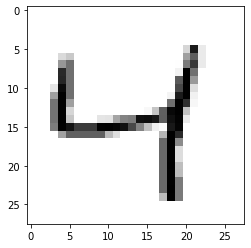

In [8]:
# scale pixel values to [0,1] - this is recommended. 
X_train = X_train/255
X_test  = X_test/255
plt.imshow(X_train[row,:].reshape(28,28) , cmap='Greys', interpolation='None')

### Our Neural Network

We want a neural network that will accept a digitized image as input

Each image yields $28^2=784$ inputs, one for each pixel value.

There are $10$ possible outputs - corresponding to the digits 
$\{0,1,2,3,4,5,6,7,8,9\}$.

Our network will have $10$ outputs. For a given input we want the 
output to be all zeros except for one which is unity. This 
non-zero will be in the position of the label.

So, if the label is $7$ then we want the output to be 
$(0,0,0,0,0,0,0,1,0,0)^T$. (Note the transpose - column vectors only.)

This is called **one hot encoding**. Let's set up the output (label) data for
the training and the test sets.

In [9]:
# make every entry zero to begin with ...
y_train = np.zeros((10, N_train))
y_test = np.zeros((10, N_test))
print(f'Shape of: y_train = {y_train.shape}, y_test = {y_test.shape}')

Shape of: y_train = (10, 100), y_test = (10, 100)


### One-Hot Encoding

We will one-hot encode the labels ready for implementation in a neural
network. There are 10 possible output values corresponding to the labels
$\{0,1,2,3,4,5,6,7,8,9\}$.

We want to use the `train_labels` and `test_labels` data from above
to create `y_train` and `y_test`.

These will be matrices with each column having $10$ entries. 

In `y_train` there will be as many columns as there are training data points
(i.e. `N_train`). And in `y_test` there will be as many columns as there
are test data points (i.e. `N_test`).

Each column contains zeros except for a single one in the position
(0,1,2,...,9) corresponding to the label (0,1,2,...,9) for that column.

Above we saw that with `choice = 2`, the third data point in the training set
had label $4$.

Hence the third column of `y_train` will be $(0,0,0,0,1,0,0,0,0,0)$.

We loop through the two data sets, grab each label in turn, and set
that position equal to unity. 

In [10]:
for k in range(N_train):
  label = train_labels[k]
  y_train[label,k] = 1

for k in range(N_test):
  label = test_labels[k]
  y_test[label,k] = 1

We can plot the sums to see how many of each label there are.

<BarContainer object of 10 artists>

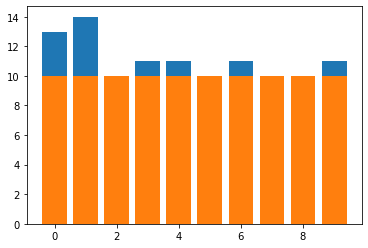

In [11]:
plt.bar(range(10),y_train.sum(axis=1))
plt.bar(range(10),y_test.sum(axis=1))

And, because we like to always be checking our work, we can add up all the
ones in each of these and make sure there are the same sumber as
`N_train` and `N_test`.

In [12]:
# add up all the ones - across both dimensions
print(y_train.sum())
print(y_test.sum())

100.0
100.0


If you are sharp-eyed you may have noticed that we are breaking one
of our rules in this set up. We've always insisted that our features vary along the 
columns, with our observations listed down the rows. 

That's the opposite of what we have done for `X_train` and `X_test`.

It doesn't matter - we just have to be consistent with our coding below.

**NOTE** the term **one hot** is an electrical analogy wherein one terminal
is considered *hot* and the other *cold* (i.e. *on* and *off*).

### Our Neural Network Architecture

We have an input layer of $28^2=784$ nodes (neurons) accepting
a pixel value per node, and an output layer of $10$ neurons capable of
yielding a one-hot encoded output.

We'll choose **two hidden layers** with $500$ nodes on the first
and $200$ on the second. These are **hyperparameters** - we have to choose
them and build them into our design. Once chosen they remain fixed.

We have already seen this type of network, along with the feed forward
algorithm.

Here is an artificial neural network with two hidden layers.

<table>
<tr>
<td>
<img src="./gfx/ann_4.png" style="height:500px"/>
</td>
<td>

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n}_1),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n}_2),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_3(\boldsymbol{n}_3),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{align*}
</td>
</tr>
</table>


### DEEP LEARNING

The addition of extra **hidden** layers between the input and output 
layers gives rise to the **deep** in **DEEP LEARNING**.

We'll see where the **learning** fits in shortly. We'lll need to
**learn** the values of the weights and biases.

For the moment though we initialise our weights with fairly small random 
numbers, and set our biases to be zero. We'll use the training data to
learn better values.

We initialise our network architecture along with the weights and biases as follows.

In [13]:
inn = 784  # number of nodes on input layer
h1n = 500  # number of nodes on first hidden layer
h2n = 200  # number of nodes on second hidden layer
onn = 10   # number of nodes on output layer

# weights and biases
W1 = 0.5 - np.random.rand(inn,h1n) # weights connecting input to first hidden
W2 = 0.5 - np.random.rand(h1n,h2n) # weights connecting first to second hidden
W3 = 0.5 - np.random.rand(h2n,onn) # weights connecting second hidden to output
b1 = np.zeros([h1n,1]) # bias on first hidden
b2 = np.zeros([h2n,1]) # bias on second hidden
b3 = np.zeros([onn,1]) # bias on output

print(f'W1 shape: {W1.shape}, W2 shape: {W2.shape}, W3 shape: {W3.shape}')
print(f'b1 shape: {b1.shape}, b2 shape: {b2.shape}, b3 shape: {b3.shape}')

W1 shape: (784, 500), W2 shape: (500, 200), W3 shape: (200, 10)
b1 shape: (500, 1), b2 shape: (200, 1), b3 shape: (10, 1)


### The Feed Forward Algorithm

We have already seen this. The feed forward algortithm,
for $L$ layers (not including the input layer) is,

\begin{align*}
& \boldsymbol{a}_0 = \boldsymbol{x},
\\
& \text{for } k = 1,2,\ldots,L,
\\
&\qquad \boldsymbol{n}_k = \boldsymbol{W}_k^T\boldsymbol{a}_{k-1}+\boldsymbol{b}_k,
\\
&\qquad \boldsymbol{a}_k = \sigma_k(\boldsymbol{n}_k),
\\
&\boldsymbol{y} = \boldsymbol{a}_L.
\end{align*}

where $\sigma$ is the activation function. We have seen the Heaviside
function for this, as well as the sigmoid and the ReLU. 

We'll define them using python functions. We will also need their
derivatives (and that's the main reason for not using the Heaviside step
function - it isn't differentiable).

In [14]:
def sigmoid(x):
  return 1/(1+np.exp(-x))
def ReLU(x):
  return np.maximum(0,x)

In [15]:
def Diff_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))
def Diff_ReLU(x):
  return np.heaviside(x,0)

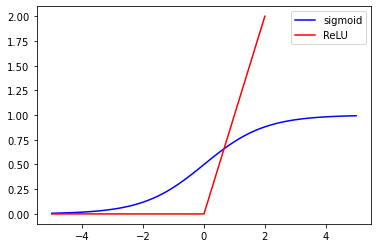

In [16]:
# Let's plot them - just to remember what they look like
xvals = np.arange(-5,5+0.1,0.1)
plt.plot(xvals, sigmoid(xvals), color='blue', label='sigmoid')
xvals = np.arange(-5,2+0.1,0.1)
plt.plot(xvals, ReLU(xvals), color='red', label='ReLU')
plt.legend()

### Feeding Forward - Forward Propagation

Here is a typical forward pass through the network. We choose a random
integer, $k$ from $\{0,1,2,\ldots,N_{\mathrm{train}}\}$, and use that to select a training point at random. Then
we apply the algorithm from above.

In [17]:
k = np.random.randint(0, X_train.shape[0])
#print(X_train[k,:].T.shape)
#print(X_train[k,:].reshape(-1,1).shape)
a0 = X_train[k,:].T # a0 = X_train[[k],:].T #a0 = X_train[k,:].reshape(-1,1)
# feed into first hidden layer and activate
n1 = W1.T @ a0 + b1
a1 = sigmoid(n1)
# feed into second hidden layer and activate
n2 = W2.T @ a1 + b2
a2 = sigmoid(n2)
# feed into output layer and activate
n3 = W3.T @ a2 + b3
a3 = sigmoid(n3)
# produce output
y = a3

**BUT THIS IS USELESS** - the weights are random and the biases are zero.
Whatever the onput, the output will be random.

### Learning - Artificial Intelligence (AI)

We want to use the training data to **learn** better values of the
weights and biases.

By **better** we mean that given an input with label, say, $5$, the 
output should be $(0,0,0,0,0,1,0,0,0,0)^T$ - a one-hot encoding of the
label corresponding to the input.

In practice our weights and biases may never be **perfect**, and
so we might not get perfect one-hot outputs. 

But we would be happy with, for example,

$$
(0.01,0.04,0.1,0.34,0.07,0.89,0.02,0.11,0.21,0.04)^T
$$

Here $0.89\approx 1$ in the index $5$ position and the other values
we treat as $\approx 0$.

If it works then we have created AI for digit recognition. This could
be used for ANPR, handwriting, and it's not much of a conceptual step
to move to digitized photos (face tagging) and voice
(Alexa, Hi Siri, OK Google)... 

No human needed... 

But we need **better** weights and biases: we get them by setting up a
cost and minimizing it.

### Cost: Total Squared Error (TSE)

There are other choices, but we have seen this one before and so will use it. 

For a given training point, indexed by $k$ say, we have two outputs. One
we call the ground truth, and is stored in `y_train`. We will call this
$\boldsymbol{t}_k$ for **truth**. It is perfectly one-hot encoded.

The other output is the prediction from the network which is given by 
$\boldsymbol{y}_k = \boldsymbol{a}_L$ in the feed-forward algorithm above.
This will not be perfectly one-hot encoded but as we have seen above 
we can be happy with just picking the maximum value and using it as
an approximation to a one-hot encoding.

We define the TSE cost as

$$
\mathcal{E}(\boldsymbol{W}_1,\boldsymbol{W}_2,\boldsymbol{W}_3,
\boldsymbol{b}_1,\boldsymbol{b}_2,\boldsymbol{b}_3)
= \sum_{k=1}^{N_{\mathrm{train}}} 
\mathscr{F}(\boldsymbol{t}_k,\boldsymbol{y}_k)
\quad\text{for the loss}\quad
\mathscr{F}_k := \mathscr{F}(\boldsymbol{t}_k,\boldsymbol{y}_k) :=
\Vert\boldsymbol{t}_k-\boldsymbol{y}_k\Vert_2^2.
$$

Normally we just write $\mathcal{E}$ for brevity, but we have to always bear in
mind that it depends on all the weights and all the biases.

### The Size of the Task

We want to choose all the weights and biases so as to minimize the error. 

Recall the size of the weight matrices and bias vectors.

$$
\boldsymbol{W}_1 \in\mathbb{R}^{784\times500},
\ \boldsymbol{W}_2 \in\mathbb{R}^{500\times200},
\ \boldsymbol{W}_3 \in\mathbb{R}^{200\times10},
$$

$$
\boldsymbol{b}_1 \in\mathbb{R}^{500},
\ \boldsymbol{b}_2 \in\mathbb{R}^{200},
\ \boldsymbol{b}_3 \in\mathbb{R}^{10}.
$$

In [18]:
Wvals = W1.size + W2.size + W3.size
bvals = b1.size + b2.size + b3.size
print('Number of values to optimize = ', Wvals + bvals)

Number of values to optimize =  494710


There are nearly half a million values to optimize in the three
full weight matrices, and the three bias vectors.

### Gradient Descent

If you have ever studied multivariable calculus and looked at
optimization problems you might have seen examples of how to optimize
a function of two variables. For example,

$$
f(x,y) = 3\,{\mathrm{e}}^{-{\left(y+1\right)}^2-x^2}\,{\left(x-1\right)}^2
-\frac{{\mathrm{e}}^{-{\left(x+1\right)}^2-y^2}}{3}
+{\mathrm{e}}^{-x^2-y^2}\,\left(10\,x^3-2\,x+10\,y^5\right).
$$

You may remember that we need to calculate the gradient, $\nabla f$, set it to zero,
$\nabla f=\boldsymbol{0}$, solve this for the optimal points,
and then check the Hessian for the nature of these optimal points. 

That isn't an option here. Instead the usual choice for minimizing
the cost is **Stochastic Gradient Descent**.

### Gradient Descent in Outline

The idea is to consider $\nabla f$ and note that this gives the
direction in which $f$ increases most rapidly. 

Therefore $-\nabla f$ tells us in which direction $f$ decreases most rapidly.

That's what we want - we want to get to the minimum. *The bottom of the hill*

We choose a point, $\boldsymbol{x}_0$ say, and then move to a new
point by **moving down the gradient**. We then iterate:

\begin{align}
\boldsymbol{x}_1 & = \boldsymbol{x}_0 - \alpha\nabla f(\boldsymbol{x}_0),
\\
\boldsymbol{x}_2 & = \boldsymbol{x}_1 - \alpha\nabla f(\boldsymbol{x}_1),
\\
\boldsymbol{x}_3 & = \boldsymbol{x}_2 - \alpha\nabla f(\boldsymbol{x}_2),
\\
\vdots & \qquad\vdots\qquad \vdots
\end{align}

Once we find a $k$ for which $\nabla f(\boldsymbol{x}_k)=\boldsymbol{0}$ (at least
approximately) we stop - we'll be at a minimum (approximately). Note that 
it might not be a **global minimum**, and it could even be a **saddle point**.

Here, and in this context, $\alpha$ is called the **learning rate**. It is another **hyperparameter**. We choose it - it does not get learned by the algorithm.

Let's see some examples of how this might work in 2D.

**NOTE** these diagrams will not show up in the PDF version of this notebook.

### Gradient Descent Demonstrations - Global and Local minima

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/GlobalMin.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/LocalMin.gif" style="height:300px"/>
    </td>
  </tr>
</table>


### Gradient Descent Demonstrations - Saddle Points

<table>
  <tr>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint1.gif" style="height:300px"/>
    </td>
    <td>
        <img src="./gfx/GradientDescent/SaddlePoint2.gif" style="height:300px"/>
    </td>
  </tr>
</table>


### Stochastic Gradient (Descent?)

The Gradient Descent process described above is too computationally expensive
for training big neural nets. 

Ours has nearly **half a million** independent variables, but that is pretty
modest by some standards. 

This number of independent variables tells us how many gradient component
directions there are. 

Also `N_train` tells us how many loss terms there are in the cost function - these 
would need to be simultaneously minimized. 

A variant, called **Stochastic Gradient Descent**, or **SGD** for short, 
is often used to save computer time and resources.

We'll use this in its simplest form (so-called **mini-batch** approaches exist) 
which is to just pick at random, and without replacement, one loss at a time
and update with that.

Some people call this **Stochastic Gradient** instead of
**Stochastic Gradient Descent** because it is not guaranteed that descent
actually occurs at a given step.

Like so much of what we have done, there is so much more we could be saying
on this topic.

### The Calculus of Learning - part 1

We're going to just outline the main steps. A deep understanding of this 
is beyond our scope.

Consider the weight matrix connecting the second hidden layer to the output layer:
$\boldsymbol{W}_3$ and let $w_{rc}$ denote the entry in row $r$ and column $c$. 
Also, consider $\boldsymbol{b}_3$ with $b_r$ in row $r$. 

We choose a loss term at random - the $k$-th term say, $\mathscr{F}_k$ - and
then an SGD update is then written like this

$$
w_{rc} \leftarrow w_{rc} -\alpha\frac{\partial\mathscr{F}_k}{\partial w_{rc}} 
\qquad\text{ and }\qquad
b_{r} \leftarrow b_{r} -\alpha\frac{\partial\mathscr{F}_k}{\partial b_{r}} 
$$

where $\leftarrow$ means *is replaced by*.
Now, $\mathscr{F}_k = \Vert\boldsymbol{t}_k-\boldsymbol{y}_k\Vert_2^2$ and so,
concentrating on the weights,

$$
\frac{\partial\mathscr{F}_k}{\partial w_{rc}}
= 
\frac{\partial}{\partial w_{rc}}
\Vert\boldsymbol{t}_k-\boldsymbol{y}_k\Vert_2^2
= 
\frac{\partial}{\partial w_{rc}}
\sum_{\ell=1}^{10}
(t_{\ell k}- y_{\ell k})^2.
$$

In this $\boldsymbol{t}_k$ is a constant, so we need to think about $y_{\ell k}$.

### The Calculus of Learning - part 2

We recall the forward prop algorithm: 

\begin{align*}
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n}_1),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n}_2),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_3(\boldsymbol{n}_3),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{align*}

In this it is the $k$-th component of $\boldsymbol{y} = \boldsymbol{a}_3$
that we are dealing with.

### The Calculus of Learning - part 3

So, we look at the $k$-th component and calculate...

$$
\frac{\partial\mathscr{F}_k}{\partial w_{rc}}
= 
\frac{\partial}{\partial w_{rc}}
\sum_{\ell=1}^{10}
(t_{\ell k}- y_{\ell k})^2
= 
-2\sum_{\ell=1}^{10}
(t_{\ell k}- y_{\ell k})
\frac{\partial y_{\ell k}}{\partial w_{rc}}
$$

But (with $L=10$ outputs and $H=200$ neurons on the second hidden layer),
and $\boldsymbol{a}_2 = (a_1, a_2, \ldots)^T$,

$$
y_{\ell k} = \sigma(n_{\ell})
\quad\text{for}\quad
n_{\ell} = \sum_{h=1}^{H} w_{h\ell}a_h + b_\ell
\quad\text{ and }\quad
\frac{\partial y_{\ell k}}{\partial w_{rc}}
= 
\sigma'(n_{\ell})
\frac{\partial n_{\ell}}{\partial w_{rc}}
$$

with $\boldsymbol{n}_{3k} = (n_1, n_2, \ldots)^T$.
It follows that

$$
\frac{\partial n_{\ell k}}{\partial w_{rc}}
= \frac{\partial}{\partial w_{rc}}\sum_{h=1}^{H} w_{h\ell}a_h + b_\ell
\quad\text{ hence }\quad
\frac{\partial n_{\ell k}}{\partial w_{rc}}
= a_r\delta_{c\ell}
$$

where $\delta_{ij} = 1$ if $i=j$ and $\delta_{ij} = 0$ otherwise (called the **Kronecker delta**).

### The Calculus of Learning - part 4

Putting this together we then get, first, 

$$
\frac{\partial y_{\ell k}}{\partial w_{rc}}
= 
\sigma'(n_{\ell k})
\frac{\partial n_{\ell k}}{\partial w_{rc}}
= 
\sigma'(n_{\ell k}) a_r\delta_{c\ell}.
$$

Therefore,

$$
\frac{\partial\mathscr{F}_k}{\partial w_{rc}}
= 
-2\sum_{\ell=1}^{10}
(t_{\ell k}- y_{\ell k})
\sigma'(n_{\ell k}) a_r\delta_{c\ell}
= 
-2\sum_{\ell=1}^{10}
e_{\ell k}
\sigma'(n_{\ell k}) a_r\delta_{c\ell}
$$

for $e_{\ell k} = t_{\ell k}- y_{\ell k}$. 

Let $\displaystyle\frac{\partial\mathscr{F}_k}{\partial \boldsymbol{W}_3}$
be the matrix with $\displaystyle\frac{\partial\mathscr{F}_k}{\partial w_{rc}}$
in row $r$ and column $c$. Then, after some manipulations, it can be shown that,

$$
\frac{\partial\mathscr{F}_k}{\partial \boldsymbol{W}_3}
= 
\boldsymbol{a}_2 \boldsymbol{S}_3^T
\quad\text{ for }\quad
\boldsymbol{S}_3 = -2 \boldsymbol{A}_3\boldsymbol{e}_k
\quad\text{ and }\quad
\boldsymbol{A}_3 = \left(\begin{array}{llll}
\sigma'(n_1) & 0 & 0 & \cdots  \\
0 & \sigma'(n_2) & 0 & \cdots  \\
0 & 0 & \sigma'(n_3) & \cdots  \\
\vdots & \vdots & \vdots & \ddots
\end{array}\right).
$$

### The Calculus of Learning - part 5

With similar manipulations it can also be shown that 
$\displaystyle\frac{\partial\mathscr{F}_k}{\partial \boldsymbol{b}_3} = \boldsymbol{S}$.

The gradient updates from earlier,

$$
w_{rc} \leftarrow w_{rc} -\alpha\frac{\partial\mathscr{F}_k}{\partial w_{rc}} 
\qquad\text{ and }\qquad
b_{r} \leftarrow w_{r} -\alpha\frac{\partial\mathscr{F}_k}{\partial b_{r}} 
$$

can now be written in explicit and computable form as,

$$
\boldsymbol{W}_3 \leftarrow \boldsymbol{W}_3
- \alpha \boldsymbol{a}_2 \boldsymbol{S}_3^T
\qquad\text{ and }\qquad
\boldsymbol{b}_3 \leftarrow \boldsymbol{b}_3
- \alpha \boldsymbol{S}_3
$$

These tell us how to update the weights and biases at the output end of the
network. 

But what about $\boldsymbol{W}_2$, $\boldsymbol{b}_2$ and 
$\boldsymbol{W}_1$, $\boldsymbol{b}_1$?

### The Calculus of Learning - part 6

To update the weights and biases further down towards the start of the network
we need 

$$
w_{rc} \leftarrow w_{rc} -\alpha\frac{\partial\mathscr{F}_k}{\partial w_{rc}} 
\qquad\text{ and }\qquad
b_{r} \leftarrow w_{r} -\alpha\frac{\partial\mathscr{F}_k}{\partial b_{r}} 
$$

where $w_{rc}$ and $b_r$ now refer to $\boldsymbol{W}_2$, $\boldsymbol{b}_2$ first,
and then to $\boldsymbol{W}_1$, $\boldsymbol{b}_1$.

We could attempt a direct calculation, as above, but this would get quite involved
as the number of layers increases. Instead we use the **back propagation**
formula:

$$
\boldsymbol{S}_{i-1}=\boldsymbol{A}_{i-1}\boldsymbol{W}_i\boldsymbol{S}_i
$$

which is applied for $i=L, L-1, \ldots, 2$.

The derivation of this is quite involved. 

### The Calculus of Learning - part 7

We consider two consecutive layers, $i-1$ and $i$, connected with the weights in
$\boldsymbol{W}_i$ and with biases $\boldsymbol{b}_i$ added on layer $i$.

Assume there are $H$ nodes on layer $i-1$ and $L$ on layer $i$. 

We use hats to denote quantities on layer $i-1$, and then the key formulae are,

$$
n_c = \sum_{\ell=1}^H
w_{\ell c} \hat{a}_\ell + b_c,
\quad
\hat{\boldsymbol{a}} = \sigma_{i-1}(\hat{\boldsymbol{n}})
\quad\text{ and }\quad
\boldsymbol{a} = \sigma_i(\boldsymbol{n}).
$$

Then (and similarly for the biases),

$$
\boldsymbol{W} \leftarrow \boldsymbol{W} - \alpha
\frac{\partial\mathscr{F}}{\partial w_{rc}}
\quad\text{ uses }\quad
\frac{\partial\mathscr{F}}{\partial w_{rc}}
=
\frac{\partial\mathscr{F}}{\partial n_{c}}
\frac{\partial n_c}{\partial w_{rc}}
$$

with

$$
\frac{\partial n_c}{\partial w_{rc}}
=
\frac{\partial }{\partial w_{rc}}
\sum_{\ell=1}^H
w_{\ell c} \hat{a}_\ell + b_c
=
\hat{a}_r
\Longrightarrow
\frac{\partial\mathscr{F}}{\partial w_{rc}}
= \hat{a}_r S_c
\text{ with }
\boldsymbol{S} = \left(\begin{array}{c}
\partial\mathscr{F}/\partial n_1 \\
\partial\mathscr{F}/\partial n_2 \\
\partial\mathscr{F}/\partial n_3 \\
\vdots
\end{array}\right)
$$

### The Calculus of Learning - part 8

We can conclude from this that 

$$
\frac{\partial\mathscr{F}}{\partial\boldsymbol{W}_i}
= \hat{\boldsymbol{a}}\boldsymbol{S}^T
\quad\text{ and }
\frac{\partial\mathscr{F}}{\partial\boldsymbol{b}_i}
= \boldsymbol{S}
$$

just as earlier at the output layer.

A key step is now to introduce the **Jacobian Matrix** 

$$
\frac{\partial\boldsymbol{n}}{\partial\hat{\boldsymbol{n}}}
=
\left(\begin{array}{cccc}
\partial n_1/\partial\hat{n}_1 & \partial n_1/\partial\hat{n}_2 & \partial n_1/\partial\hat{n}_3 & \cdots
\\ 
\partial n_2/\partial\hat{n}_1 & \partial n_2/\partial\hat{n}_2 & \partial n_2/\partial\hat{n}_3 & \cdots
\\
\partial n_3/\partial\hat{n}_1 & \partial n_3/\partial\hat{n}_2 & \partial n_3/\partial\hat{n}_3 & \cdots
\\
\vdots & \vdots & \vdots & \ddots
\end{array}\right)
$$

and then use $\hat{\boldsymbol{a}} = \hat{\sigma}(\hat{\boldsymbol{n}})$ to calculate

$$
\frac{\partial n_c}{\partial\hat{n}_r}
=
\frac{\partial }{\partial\hat{n}_r}
\sum_{\ell=1}^H w_{\ell c} \hat{a}_\ell + b_c
=
w_{rc}\frac{\partial\hat{a}_r}{\partial\hat{n}_r}
=
w_{rc}\hat{\sigma}'(\hat{n}_r).
$$

### The Calculus of Learning - part 9

It follows that

$$
\frac{\partial\boldsymbol{n}}{\partial\hat{\boldsymbol{n}}}
=
\boldsymbol{W}^T\hat{\boldsymbol{A}}
\quad\text{ for }\quad
\hat{\boldsymbol{A}} = \left(\begin{array}{llll}
\hat{\sigma}'(\hat{n}_1) & 0 & 0 & \cdots  \\
0 & \hat{\sigma}'(\hat{n}_2) & 0 & \cdots  \\
0 & 0 & \hat{\sigma}'(\hat{n}_3) & \cdots  \\
\vdots & \vdots & \vdots & \ddots
\end{array}\right).
$$

From above we define $\hat{\boldsymbol{S}}$ analogously to $\boldsymbol{S}$ as

$$
\hat{\boldsymbol{S}} = \left(\begin{array}{c}
\partial\mathscr{F}/\partial \hat{n}_1 \\
\partial\mathscr{F}/\partial \hat{n}_2 \\
\partial\mathscr{F}/\partial \hat{n}_3 \\
\vdots
\end{array}\right)
\quad\text{ then }\quad
\hat{S}_r
= \frac{\partial\mathscr{F}}{\partial\hat{n}_r}
= \sum_\ell\frac{\partial n_\ell}{\partial\hat{n}_r}\frac{\partial\mathscr{F}}{\partial n_\ell}
= \sum_\ell\frac{\partial n_\ell}{\partial\hat{n}_r}S_\ell
$$


$$
\text{and so }
\hat{\boldsymbol{S}}
= \left(\frac{\partial\boldsymbol{n}}{\partial\hat{\boldsymbol{n}}}\right)^T\boldsymbol{S}
= \left(\boldsymbol{W}^T\hat{\boldsymbol{A}}\right)^T\boldsymbol{S}
= \hat{\boldsymbol{A}}\boldsymbol{W}\boldsymbol{S}
\text{ because } \hat{\boldsymbol{A}}=\hat{\boldsymbol{A}}^T.
$$

Layer-by-layer this **recursion** is
$\boldsymbol{S}_{i-1}=\boldsymbol{A}_{i-1}\boldsymbol{W}_i\boldsymbol{S}_i$
and is called **back propagation**.


From above we have 

$$
\frac{\partial\mathscr{F}}{\partial\boldsymbol{W}_i}
= \boldsymbol{a}_{i-1}\boldsymbol{S}_i^T
\quad\text{ and }
\frac{\partial\mathscr{F}}{\partial\boldsymbol{b}_i}
= \boldsymbol{S}_i
$$

We have $\boldsymbol{S}_L = -2\boldsymbol{A}_i\boldsymbol{e}$ at the output layer,
and we can compute $\boldsymbol{S}_{L-1}$, $\boldsymbol{S}_{L-2}$, $\boldsymbol{S}_{L-3}, \ldots$,
recursively from the **SAWS** backprop recursion 
$\boldsymbol{S}_{i-1}=\boldsymbol{A}_{i-1}\boldsymbol{W}_i\boldsymbol{S}_i$

We now have eveythine we need...

### The Forward and Backward Propagation ('backprop') Algorithm - Learning from Data

\begin{align*}
\begin{array}{rl}
\text{forward} &\text{prop} 
\\\ \\
\boldsymbol{a}_0 & = \boldsymbol{x},
\\
\boldsymbol{n}_1 & = \boldsymbol{W}_1^T\boldsymbol{a}_0+\boldsymbol{b}_1,
\\
\boldsymbol{a}_1 & = \sigma_1(\boldsymbol{n}_1),
\\
\boldsymbol{n}_2 & = \boldsymbol{W}_2^T\boldsymbol{a}_1+\boldsymbol{b}_2,
\\
\boldsymbol{a}_2 & = \sigma_2(\boldsymbol{n}_2),
\\
\boldsymbol{n}_3 & = \boldsymbol{W}_3^T\boldsymbol{a}_2+\boldsymbol{b}_3,
\\
\boldsymbol{a}_3 & = \sigma_3(\boldsymbol{n}_3),
\\
\boldsymbol{y} & = \boldsymbol{a}_3.
\end{array}
\qquad &\qquad
\begin{array}{rl}
\text{back} &\text{prop}
\\\ \\
\boldsymbol{e}_k & = \boldsymbol{t}_k-\boldsymbol{y}_k,
\\
\boldsymbol{S}_3 & = -2\boldsymbol{A}_3\boldsymbol{e}_k,
\\
\boldsymbol{W}_3 & \leftarrow \boldsymbol{W}_3
- \alpha \boldsymbol{a}_2 \boldsymbol{S}_3^T
\text{ and }
\boldsymbol{b}_3 \leftarrow \boldsymbol{b}_3
- \alpha \boldsymbol{S}_3
\\
\boldsymbol{S}_2 & = \boldsymbol{A}_2\boldsymbol{W}_3\boldsymbol{S}_3
\\
\boldsymbol{W}_2 & \leftarrow \boldsymbol{W}_2
- \alpha \boldsymbol{a}_1 \boldsymbol{S}_2^T
\text{ and }
\boldsymbol{b}_2 \leftarrow \boldsymbol{b}_2
- \alpha \boldsymbol{S}_2
\\
\boldsymbol{S}_1 & = \boldsymbol{A}_1\boldsymbol{W}_2\boldsymbol{S}_2
\\
\boldsymbol{W}_1 & \leftarrow \boldsymbol{W}_1
- \alpha \boldsymbol{a}_0 \boldsymbol{S}_1^T
\text{ and }
\boldsymbol{b}_1 \leftarrow \boldsymbol{b}_1
- \alpha \boldsymbol{S}_1
\end{array}
\end{align*}


### Our Neural Network - training and testing

Here is the basic implementation algortithm for learning and testing

- Choose hyperparameters such as learning rate $\alpha$ and network architecture.

- Choose a positive integer $N_{\mathrm{epochs}}$ as the **number of epochs** to use in 
training. An **epoch** is a single loop through the whole training set, updating weights
and biases for each data point.

- For each epoch, choose an integer $k$ from $\{1,2,\ldots,N_{\mathrm{train}}\}$
without replacement (in code the indices start at zero).

  - Forward prop that training data point and calculate the error
    $\boldsymbol{e}_k = \boldsymbol{t}_k - \boldsymbol{y}_k$

  - Use the error to initiate the backprop and gradient descent updates.
  
  - Repeat for the next $k$

- At the end of each epoch update the cost $\mathcal{E}$ for later plotting.

- At the end of training, run the test data through one point at a time,
and use the approximate one-hot encoding in the outputs $\boldsymbol{y}$
to assess the accuracy of the network.

Here's the code...

In [31]:
for ep in range(4):
    choices = np.random.permutation(5) #[:3]
    for k in range(5):
        j = choices[k]
        print(j, end=', ')
    print('\n')

0, 4, 3, 2, 1, 

2, 4, 1, 3, 0, 

4, 2, 3, 0, 1, 

2, 1, 4, 0, 3, 



In [19]:
# get access to a random number generate for SGD
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
rng = np.random.default_rng()
# select a learning rate for SGD
alpha = 0.3
# loop through this many epochs
N_ep = 50
# initialise the TSE cost
TSEcost = np.zeros([N_ep,1])

We train by looping `N_ep` times through the training set.

Each such loop randomly sleects a direction (training point) in
which to learn (update) new values for the weights and biases.

The random selection is done **without replacement**.

In the slides view the next cell will not fully display - it is too long.

In [20]:
for ep in range(N_ep): 
  for k in range(N_train):
    # select a random without replacement
    j = rng.choice(N_train, 1, replace=False)
    # forward prop
    a0 = X_train[j,:].T 
    #a0 = X_train[j,:].reshape(-1,1)
    if ep == 1 and k == 1:
      print(a0.shape, X_train[j,:].T.shape)
    n1 = W1.T @ a0 + b1
    a1 = sigmoid(n1)
    n2 = W2.T @ a1 + b2
    a2 = sigmoid(n2)
    n3 = W3.T @ a2 + b3
    a3 = sigmoid(n3)
    y = a3
    # backprop and update
    error = y_train[:,j] - y
    A3 = np.diagflat(Diff_sigmoid(n3))
    A2 = np.diagflat(Diff_sigmoid(n2))
    A1 = np.diagflat(Diff_sigmoid(n1))
    S3 = -2*A3@error
    S2 = A2@W3@S3
    S1 = A1@W2@S2

    W3 = W3 - alpha * a2@S3.T
    W2 = W2 - alpha * a1@S2.T
    W1 = W1 - alpha * a0@S1.T

    b3 = b3 - alpha * S3
    b2 = b2 - alpha * S2
    b1 = b1 - alpha * S1

  # update cost - loop through training set
  for j in range(N_train):
    a0 = X_train[j,:].T
    #a0 = X_train[j,:].reshape(-1,1)
    if ep == 1 and j == 1:
      print(j, a0.shape, X_train[[j],:].T.shape)
    n1 = W1.T @ a0 + b1
    a1 = sigmoid(n1)
    n2 = W2.T @ a1 + b2
    a2 = sigmoid(n2)
    n3 = W3.T @ a2 + b3
    a3 = sigmoid(n3)
    y = a3
    error = y_train[:,[j]] - y
    TSEcost[ep] += (error * error).sum()

(784, 1) (784, 1)
1 (784,) (784, 1)


Text(0, 0.5, 'cost')

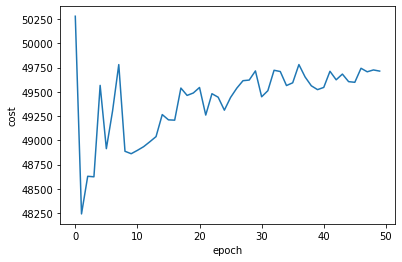

In [21]:
plt.plot(range(N_ep), TSEcost)
plt.xlabel('epoch'); plt.ylabel('cost')

In [ ]:
# test - create a matrix to hold the predictions
y_pred = np.zeros((10, X_test.shape[0]))
print(f'Shape of y_test = {y_test.shape}')

# create scorecards...
success = np.zeros(10)
failure = np.zeros(10)

for k in range(N_test):
  # forward prop
  a0 = X_test[k,:].reshape(-1,1)
  n1 = W1.T @ a0 + b1
  a1 = sigmoid(n1)
  n2 = W2.T @ a1 + b2
  a2 = sigmoid(n2)
  n3 = W3.T @ a2 + b3
  a3 = sigmoid(n3)
  y_pred[:,[k]] = a3  
  if np.argmax(a3) == test_labels[k]:
#    print(test_labels[k])
#    print(np.argmax(a3))
    success[test_labels[k]] += 1
  else:
    failure[test_labels[k]] += 1


```
y_mod = np.zeros(y_pred.shape)
print(y_test)
#print(y_pred)
indx_max = np.argmax(y_pred, axis=0)
print(indx_max)
#y_mod[indx_max,:] = 1
for k in range(N_test):
  y_mod[indx_max[k],k] = 1
print(y_mod)
```

In [ ]:

y_test_cm = np.zeros(N_test)
y_pred_cm = np.zeros(N_test)
test_indx_max = np.argmax(y_test, axis=0)
#print(test_indx_max)

pred_indx_max = np.argmax(y_pred, axis=0)
for k in range(N_test):
  y_test_cm[k] = test_indx_max[k]
  y_pred_cm[k] = pred_indx_max[k]

#print(y_test_cm)
#print(y_pred_cm)

In [ ]:
print(success)
print(failure)

Mac, Terminal

```
system_profiler SPPowerDataType
```

Bettrey full. Disconnect charger. Run below

```
6417 mAh at start, dim display.
```

In [ ]:
# MYO small set wont fill up the full 0,1,...,9 range for the CM
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_cm, y_pred_cm)
print("Confusion Matrix:")
print(cm)
accsc = accuracy_score(y_test_cm,y_pred_cm)
print("Accuracy:", accsc)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=range(10))
#plt.figure(figsize=(15, 15))
#cmplot.plot()

fig, ax = plt.subplots(figsize=(8,8))
cmplot.plot(ax=ax)

#plt.show()

<http://playground.tensorflow.org>

<https://ethics-of-ai.mooc.fi/chapter-1/1-a-guide-to-ai-ethics>



# ANN in a few lines
21 Oct 2022 from https://twitter.com/svpino/status/1582703127651721217

In [ ]:
import numpy as np

def sigmoid(x):
  return 1 / (1+np.exp(-x))

def neural_network(X,y):
    learning_rate = 0.1
    W1 = np.random.rand(2,4)
    W2 = np.random.rand(4,1)
    
    for epoch in range(1000):
        layer1 = sigmoid(np.dot(X, W1))
        output = sigmoid(np.dot(layer1, W2))
        error = y-output
        delta2 = 2 * error * (output * (1 - output))
        delta1 = delta2.dot(W2.T) * (layer1 * (1 - layer1))
        W2 += learning_rate * layer1.T.dot(delta2)
        W1 += learning_rate * X.T.dot(delta1)
    
    return np.round(output).flatten()

X = np.array([[0,0],[0,1],[1,0],[1,1]])

print(  "OR", neural_network( X, np.array([[0,1,1,1]]).T ) )
print( "AND", neural_network( X, np.array([[0,0,0,1]]).T ) )
print( "XOR", neural_network( X, np.array([[0,1,1,0]]).T ) )
print("NAND", neural_network( X, np.array([[1,1,1,0]]).T ) )
print( "NOR", neural_network( X, np.array([[1,0,0,0]]).T ) )

### Review

PUT DATA ON BRIGHTSPACE, or WEB PAGE

PUT BACKPROP ON BRIGHTSPACE



We covered *just enough*, to make *progress at pace*. We looked at

- SVM
- distance
- ???????????????????????????????????????????????

Now we can look at the perceptron.

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 14_ann.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [ ]:
%%bash
NBROOTNAME=14_ann
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi